In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import skew

In [43]:
dataset = pd.read_csv('wiki4HE.csv', sep=';')
dataset.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


In [44]:
dataset.dtypes

AGE                int64
GENDER             int64
DOMAIN            object
PhD                int64
YEARSEXP          object
UNIVERSITY         int64
UOC_POSITION      object
OTHER_POSITION    object
OTHERSTATUS       object
USERWIKI          object
PU1               object
PU2               object
PU3               object
PEU1              object
PEU2              object
PEU3              object
ENJ1              object
ENJ2              object
Qu1               object
Qu2               object
Qu3               object
Qu4               object
Qu5               object
Vis1              object
Vis2              object
Vis3              object
Im1               object
Im2               object
Im3               object
SA1               object
SA2               object
SA3               object
Use1              object
Use2              object
Use3              object
Use4              object
Use5              object
Pf1               object
Pf2               object
Pf3               object


In [45]:
dataset[dataset == '?'] = np.nan
dataset.isnull().sum()

C:\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AGE                 0
GENDER              0
DOMAIN              2
PhD                 0
YEARSEXP           23
UNIVERSITY          0
UOC_POSITION      113
OTHER_POSITION    261
OTHERSTATUS       540
USERWIKI            4
PU1                 7
PU2                11
PU3                 5
PEU1                4
PEU2               14
PEU3               97
ENJ1                7
ENJ2               17
Qu1                 7
Qu2                10
Qu3                15
Qu4                22
Qu5                29
Vis1               72
Vis2              117
Vis3                8
Im1                22
Im2                20
Im3                57
SA1                11
SA2                12
SA3                11
Use1               14
Use2               17
Use3                9
Use4               23
Use5               15
Pf1                11
Pf2                 6
Pf3                14
JR1                27
JR2                53
BI1                32
BI2                43
Inc1               35
Inc2      

In [46]:
lcolumns = dataset.columns

As far as I know about inputing a data we have a rule of thumb which is:
● Median (Skew Distribution)
● Mode (Categorical)
● Mean (Normal Distribution)

Column:  DOMAIN
2


<Figure size 288x288 with 0 Axes>

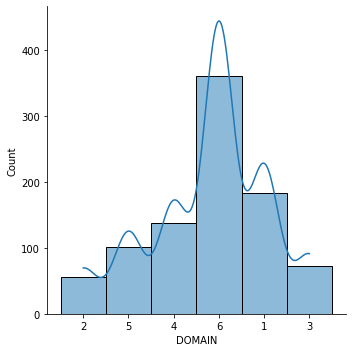

In [47]:
print('Column: ', lcolumns[2])
print(dataset[lcolumns[2]].isnull().sum())
plt.figure(figsize=(4,4))
ax = sns.displot(data=dataset[lcolumns[2]].dropna(), kde=True)
plt.show()

In [48]:
# Categorical data
dataset[lcolumns[2]] = dataset[lcolumns[2]].fillna(dataset[lcolumns[2]].mode().values[0])
dataset[lcolumns[2]].isnull().sum()

0

Column:  YEARSEXP
23


<Figure size 288x288 with 0 Axes>

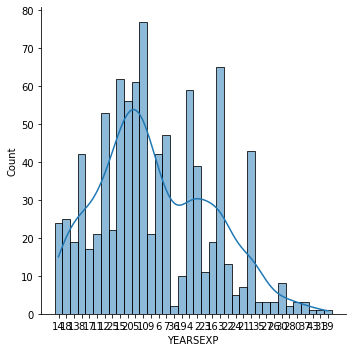

In [49]:
colNum = 4
print('Column: ', lcolumns[colNum])
print(dataset[lcolumns[colNum]].isnull().sum())
plt.figure(figsize=(4,4))
ax = sns.displot(data=dataset[lcolumns[colNum]].dropna(), kde=True)
plt.show()

In [53]:
# Skew data
dataset[lcolumns[colNum]] = dataset[lcolumns[colNum]].fillna(dataset[lcolumns[colNum]].median())
dataset[lcolumns[colNum]] = dataset[lcolumns[colNum]].astype('int64')
dataset[lcolumns[colNum]].isnull().sum()

0

Column:  UOC_POSITION
113


<Figure size 288x288 with 0 Axes>

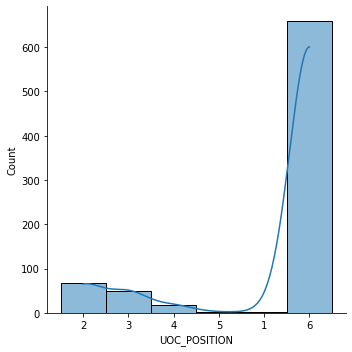

In [56]:
colNum = 6
print('Column: ', lcolumns[colNum])
print(dataset[lcolumns[colNum]].isnull().sum())
plt.figure(figsize=(4,4))
ax = sns.displot(data=dataset[lcolumns[colNum]].dropna(), kde=True)
plt.show()

In [57]:
# Categorical data
dataset[lcolumns[colNum]] = dataset[lcolumns[colNum]].fillna(dataset[lcolumns[colNum]].mode().values[0])
dataset[lcolumns[colNum]].isnull().sum()

0

UOC_POSITION (academic position of UOC members): 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct
OTHER (main job in another university for part-time members): 1=Yes; 2=No
OTHER_POSITION (work as part-time in another university and UPF members): 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct
USERWIKI (Wikipedia registered user): 0=No; 1=Yes
